In [14]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from datasets.HiggsBosonDataset import HiggsBosonDataset
from datasets.MappingDataset import MappingDataset
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import Datasets
higgs = HiggsBosonDataset()
mapping = MappingDataset()

# KMeans Clustering
---
### Higgs Boson Dataset

In [4]:
#Split Train data to train and validation Data
X_train, y_train = higgs.get_train_data()
X_test, y_test = higgs.get_test_data()

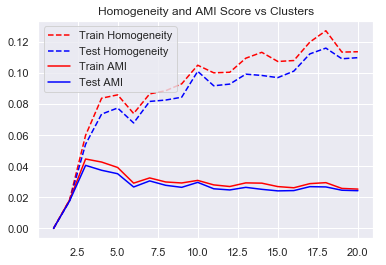

In [15]:
ks, fit_times = plot_kmeans_elbow_curve_train_test(X_train, X_test, y_train, y_test)

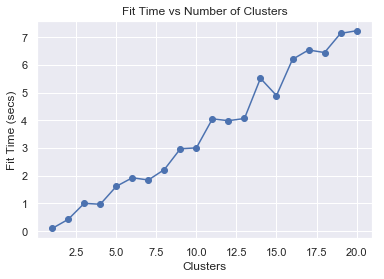

In [21]:
plt.plot(ks, fit_times,'-o')
plt.title('Fit Time vs Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Fit Time (secs)')
plt.savefig('../images/higgs_kmeans_fitbyclust.png')
plt.show()



In [9]:
kmeans = KMeans(n_clusters=7)

t0 = timer()
kmeans.fit(X_train)
time = timer() - t0
print('Fit Time: %.3f seconds' % (time))

bench_kmeans(kmeans, '\tkmeans Train Set',X_train, y_train)
print()
bench_kmeans(kmeans, '\tkmeans Test Set',X_test, y_test)

Fit Time: 2.014 seconds
Estimator:	kmeans Train Set
intertia	315970
Homogeneity	0.087
AMI		0.033

Estimator:	kmeans Test Set
intertia	315970
Homogeneity	0.081
AMI		0.030


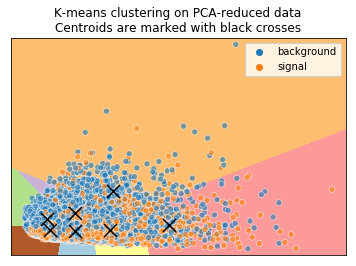

In [12]:
plot_pca_reduced_data_kmeans(X_train, kmeans, true_labels = y_train, label_dict = higgs.get_class_dict())

<Figure size 432x288 with 0 Axes>

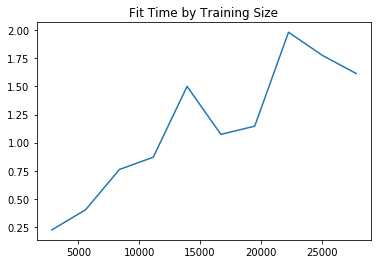

In [13]:
plot_fit_time_train_size(X_train, kmeans)

### Mapping Dataset

In [26]:
#Split Train data to train and validation Data
X_train, y_train = mapping.get_train_data()
X_test, y_test = mapping.get_test_data()

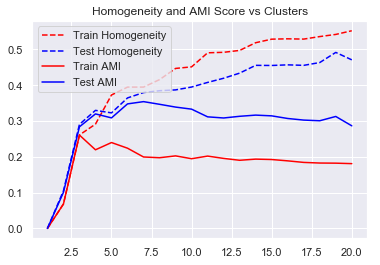

In [27]:
ks, fit_times = plot_kmeans_elbow_curve_train_test(X_train, X_test, y_train, y_test)

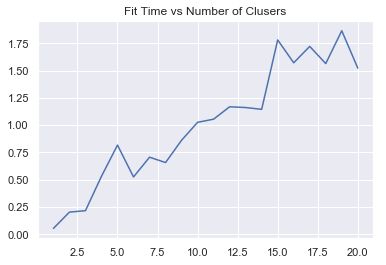

In [28]:
plt.plot(ks, fit_times)
plt.title('Fit Time vs Number of Clusers')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=6)

t0 = timer()
kmeans.fit(X_train)
time = timer() - t0
print('Fit Time: %.3f seconds' % (time))

bench_kmeans(kmeans, '\tkmeans Train Set',X_train, y_train)
print()
bench_kmeans(kmeans, '\tkmeans Test Set',X_test, y_test)

Fit Time: 0.509 seconds
Estimator:	kmeans Train Set
intertia	180395
Homogeneity	0.395
AMI		0.224

Estimator:	kmeans Test Set
intertia	180395
Homogeneity	0.366
AMI		0.350


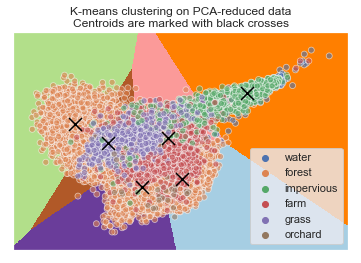

In [30]:
plot_pca_reduced_data_kmeans(X_train, kmeans, true_labels = y_train, label_dict = mapping.get_class_dict())

## Expectation Maximazation (Gaussian Mixture Models)

### Higgs Boson Dataset

In [111]:
#Split Train data to train and validation Data
X_train, y_train = higgs.get_train_data()
X_test, y_test = higgs.get_test_data()

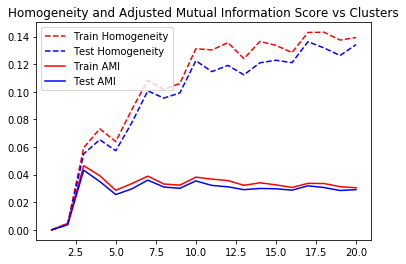

In [113]:
ks, fit_times = plot_em_elbow_curve_train_test(X_train, X_test, y_train, y_test)

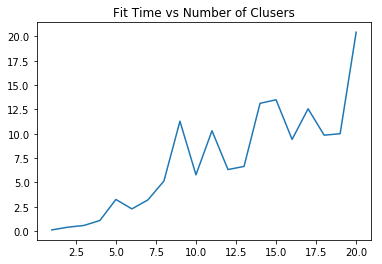

In [114]:
plt.plot(ks, fit_times)
plt.title('Fit Time vs Number of Clusers')
plt.show()

In [121]:
gmm = GaussianMixture(n_components=7)

t0 = timer()
gmm.fit(X_train)
time = timer() - t0
print('Fit Time: %.3f seconds' % (time))

bench_em(gmm, '\tGMM Train Set',X_train, y_train)
print()
bench_em(gmm, '\tGMM Test Set',X_test, y_test)

Fit Time: 4.522 seconds
Estimator:	GMM Train Set
Homogeneity	0.100
AMI		0.034

Estimator:	GMM Test Set
Homogeneity	0.095
AMI		0.032


<Figure size 432x288 with 0 Axes>

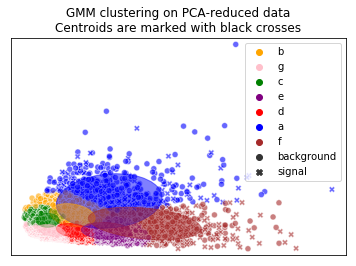

In [150]:
plot_pca_reduced_data_em(X_train, gmm, true_labels = y_train, label_dict = higgs.get_class_dict())

<Figure size 432x288 with 0 Axes>

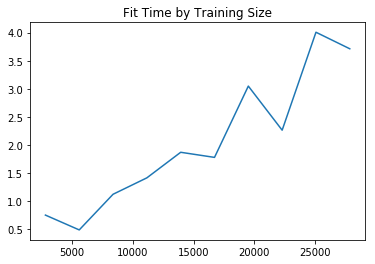

In [125]:
plot_fit_time_train_size(X_train, gmm)

## Mapping Dataset

In [152]:
#Split Train data to train and validation Data
X_train, y_train = mapping.get_train_data()
X_test, y_test = mapping.get_test_data()

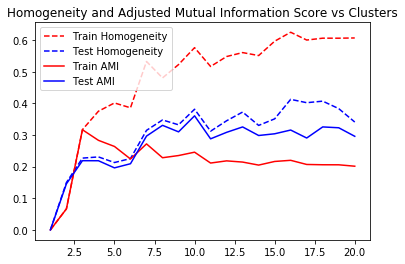

In [153]:
ks, fit_times = plot_em_elbow_curve_train_test(X_train, X_test, y_train, y_test)

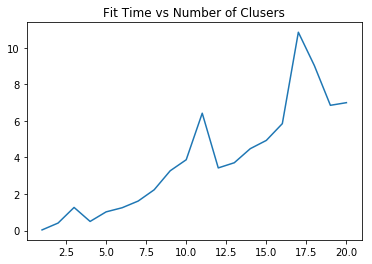

In [154]:
plt.plot(ks, fit_times)
plt.title('Fit Time vs Number of Clusers')
plt.show()

In [158]:
gmm = GaussianMixture(n_components=10)

t0 = timer()
gmm.fit(X_train)
time = timer() - t0
print('Fit Time: %.3f seconds' % (time))

bench_em(gmm, '\tGMM Train Set',X_train, y_train)
print()
bench_em(gmm, '\tGMM Test Set',X_test, y_test)

Fit Time: 1.950 seconds
Estimator:	GMM Train Set
Homogeneity	0.549
AMI		0.233

Estimator:	GMM Test Set
Homogeneity	0.321
AMI		0.293


<Figure size 432x288 with 0 Axes>

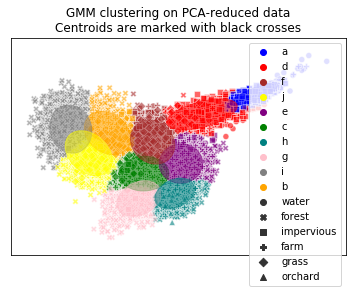

In [161]:
plot_pca_reduced_data_em(X_train, gmm, true_labels = y_train, label_dict = mapping.get_class_dict())

<Figure size 432x288 with 0 Axes>

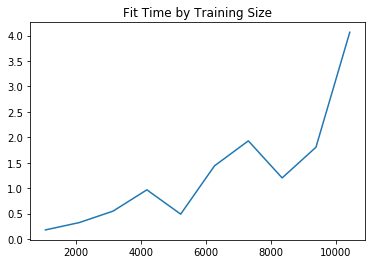

In [162]:
plot_fit_time_train_size(X_train, gmm)